<a href="https://colab.research.google.com/github/Parth-G27/Pytorch-work/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch WorkFlow 
#### 1. Get Data ready
#### 2. Build or Pick pretrained model -> Pick loss function & optimizer -> Build a training loop -> 
#### 3. Fit the model to the data (Training) and make predictions
#### 4. Evaluate the model
#### 5. Improve through experimentation 
#### 6. Save and relode the trained model

In [5]:
import torch
from torch import nn

### Machine Learning 2 Parts
#### 1. Get Data into numerical representation
#### 2. Build a model  to learn patterns in that nemerical respresentation

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Using linear regression formula to  make a straight line with known parameters.

In [15]:
# Our known parameters are weight & bias
weight = 0.5
bias = 0.2

# create data
start = 0
end = 1
X = torch.arange(start,end,0.02).unsqueeze(dim=1)
Y = weight*X + bias
X[:5],X.ndim,Y[:5],Y.ndim

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 2,
 tensor([[0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400]]),
 2)

#### Creating Training and Test Sets by splitting the data into the two 
##### Training 80% Test 20%

In [18]:
train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

In [28]:
def plot_predictions(
        train_data = X_train,
        train_labels = Y_train,
        test_data = X_test,
        test_labels = Y_test,
        predictions=None):
    
    plt.scatter(train_data,train_labels, c="b", s=5, label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=5,label="Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=5,label="Predictions")

    plt.legend()
    

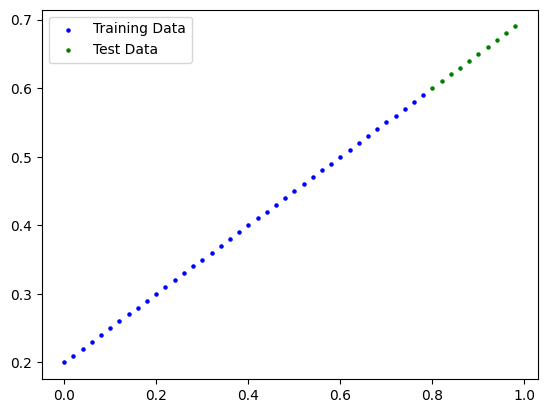

In [29]:
plot_predictions()